# Getting started

## Importing Packages and our Dataset
#### You'll need to replace the repository below with yours that contains the imputed dataset


In [28]:
cd

/Users/liamg


In [29]:
cd Documents/Uni/Internship/Data

/Users/liamg/Documents/Uni/Internship/Data


In [30]:
# General Packages that we'll use to handle and plot any data for now
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read it in as a csv, and also set up a back up reference "o_data_"
data = pd.read_csv("imputed_data_V4.csv")
o_data = data
prop_NAs = data.isnull().sum().sum() / (data.shape[0] * data.shape[1])
print(f"{prop_NAs}% of our values are missing values")
data.head()


0.0% of our values are missing values


,gender.male_1,n_current_diseases,eGFR,n_visits_out_all_12m_MUMC.ord,in_all_12m_MUMC.yes_1,n_visits_out_current_specialty_12m_36m_MUMC.ord,high_risk_medicines.yes_1,housing,patient_reported_medicine_use.yes_1,pill_box.yes_1,...,specialty_MUMC_external_hospital.pediatrics_1,specialty_MUMC_external_hospital.anesthesiology_1,specialty_MUMC_external_hospital.other_1,n_specialty_MUMC_external_hospital,n_specialty_MUMC_external_hospital.centered,n_specialty_MUMC_external_hospital.std,revision_physician.medicine_1,revision_physician.non_medicine_1,revision_physician.none_1,y
0,0,0,60-89 ml/min,> 5,0,3+,0,independent,1,0,...,0,0,1,3,-0.147712,-0.076679,0,0,1,0
1,0,1,> 90 ml/min,> 5,0,2,1,independent,1,0,...,0,0,0,2,-1.147712,-0.595786,0,0,1,0
2,0,3,> 90 ml/min,2-5,0,3+,0,independent,1,0,...,0,0,1,3,-0.147712,-0.076679,0,0,1,0
3,0,2,60-89 ml/min,2-5,0,3+,1,independent,1,1,...,0,0,0,3,-0.147712,-0.076679,0,0,1,0
4,0,3,15-29 ml/min,1,1,1,1,home care,1,1,...,0,0,1,7,3.852288,1.999751,0,0,1,0


Now we need to do a quick check on the types of data agian, as editing the data in excel can cause the values to be converted into something wrong

In [31]:
for col in data.columns:
    if isinstance(data.iloc[0][col], str):
        print("string entries need to be factorised for", col)

string_cols = data.select_dtypes(include=['object']).columns # getting all string type columns
data[string_cols] = data[string_cols].apply(lambda x: pd.factorize(x)[0]) # factorising them all 
  
# measurements were placed into strange orders of categories 
# so we're just rematching them to make slightly more sense
egfr_map = {4: 0, 2: 1, 3: 2, 0: 3, 1: 4}
data['eGFR'] = data['eGFR'].map(egfr_map)   


string entries need to be factorised for eGFR
string entries need to be factorised for n_visits_out_all_12m_MUMC.ord
string entries need to be factorised for n_visits_out_current_specialty_12m_36m_MUMC.ord
string entries need to be factorised for housing
string entries need to be factorised for person_responsible_for_medicines
string entries need to be factorised for education
string entries need to be factorised for medicines_literacy
string entries need to be factorised for revision_physician
string entries need to be factorised for out_specialty_current_MUMC


## We will do a last correlation check

(192, 192)


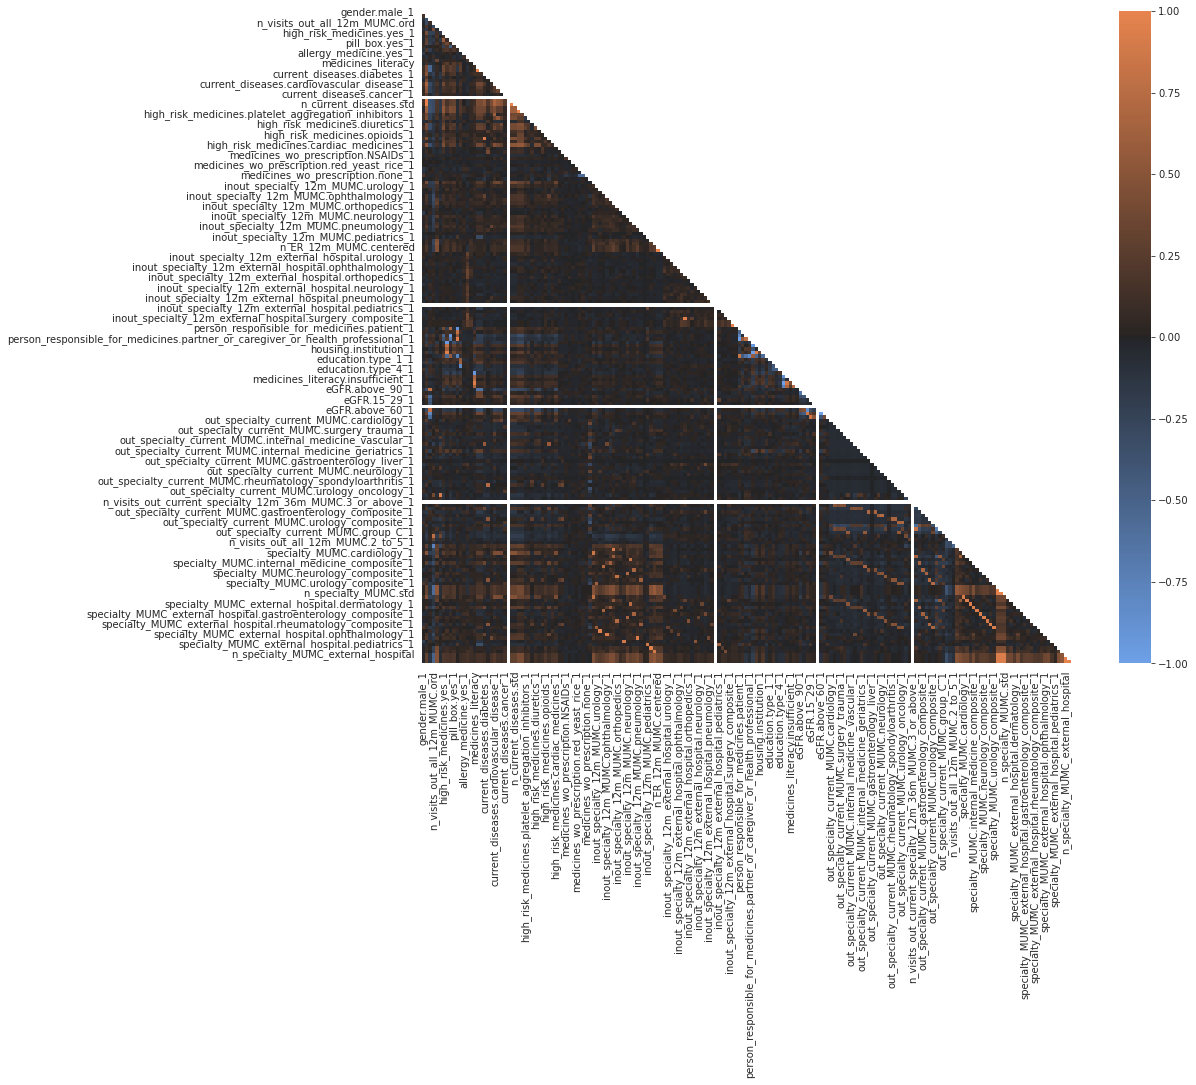

In [32]:
cor_matrix = data.drop(['y', 
                        'revision_physician.medicine_1', 
                        'revision_physician.non_medicine_1', 
                        'revision_physician.none_1',
                        'revision_physician',
                        'record'], axis=1).corr()

print(cor_matrix.shape)


# defining a function for corr heatmap plot where you just have to pass a correlation matrix in
def cor_heatmap(cor_matrix: pd.DataFrame, figsize=(16, 12)):
    with sns.axes_style("white"):
        palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
        mask = np.triu(np.ones_like(cor_matrix, dtype=bool))
        fig, ax = plt.subplots(figsize=figsize) 
        ax = sns.heatmap(cor_matrix, mask=mask, center=0, square=True, fmt='.2f', cmap=palette, ax=ax)
#         plt.savefig(filename, bbox_inches='tight')    
    
    
cor_heatmap(cor_matrix, figsize=(16, 12))


If you want to see the specific correlations between two features, then run it below

In [34]:
import itertools

correlated_features = set()
for i, j in itertools.combinations(range(len(cor_matrix.columns)), 2):
        if abs(cor_matrix.iloc[i, j]) > 0.8:
            corr_colname = cor_matrix.columns[i]
            correlated_features.add(corr_colname)
            corr2_colname = cor_matrix.columns[j]
            print(f"sig. cor. between {corr_colname} and {corr2_colname}")
            
# Add additional features to remove

correlated_features = [feature for feature in correlated_features if "_1" not in feature and "std" not in feature]
correlated_features += ["n_ER_12m_external_hospital.centered", "n_ER_12m_MUMC.centered"]

print(f"{len(correlated_features)} correlated features will actually be removed, including:")
for feature in correlated_features:
    print(f"- {feature}")
else:
    print("That's it.")


sig. cor. between n_current_diseases and n_current_diseases.centered
sig. cor. between n_current_diseases and n_current_diseases.std
sig. cor. between eGFR and eGFR.above_60_1
sig. cor. between eGFR and eGFR.below_60_1
sig. cor. between n_visits_out_current_specialty_12m_36m_MUMC.ord and n_visits_out_current_specialty_12m_36m_MUMC.1_1
sig. cor. between housing and housing.independent_1
sig. cor. between housing and housing.home_care_or_institution_1
sig. cor. between patient_reported_medicine_use.yes_1 and person_responsible_for_medicines.health_professional_1
sig. cor. between person_responsible_for_medicines and person_responsible_for_medicines.patient_1
sig. cor. between person_responsible_for_medicines and person_responsible_for_medicines.partner_or_caregiver_1
sig. cor. between person_responsible_for_medicines and person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1
sig. cor. between education and education.type_3_1
sig. cor. between medicines_literacy an

So, from above, we can see that the majority of 'significant' correlations still present in our dataset are due to alternatives forms of the same measurements. 


Such as:

Prescribed medicines count 
    
    - n_prescribed_medicines.std
    - n_prescribed_medicines.centered

or 

No. of specialists visited 
    
    - n_specialty_MUMC_external_hospital
    - n_specialty_MUMC_external_hospital.centered
    - n_specialty_MUMC_external_hospital.std
    

We can also see that a lot of categorical dummy variables have been correlated with similar dummy variables, 
for now, we'll ignore these 

In [35]:
# dropping correlated and irrelevant 
model_data = data.drop(correlated_features, axis = 1)
model_data = model_data.drop(['record', 'current_diseases.none_of_the_above_1', 'revision_physician'], axis=1)

# actual training data
model_data.shape


(2295, 180)

# Train:Test split - 80:20 divide
### First, the packages

In [36]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [37]:
labels = ['y', 'revision_physician.medicine_1', 'revision_physician.non_medicine_1', 'revision_physician.none_1']   # Everything we don't want in our training

features = model_data.drop(labels, axis=1)
target = model_data['y']

# 1st training:test split 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=13)

num_positive_outcomes = sum(target == 1)
prop_negative_outcomes = round(sum(target == 0) / len(target), 2)
num_positive_train_outcomes = sum(y_train == 1)
prop_negative_train_outcomes = round(sum(y_train == 0) / len(y_train), 2)

print(f"Total number of positive class outcomes: {num_positive_outcomes}")
print(f"Proportion of negative class outcomes: {prop_negative_outcomes}")
print(f"Number of positive class outcomes in training set: {num_positive_train_outcomes}")
print(f"Proportion of negative class outcomes in training set: {prop_negative_train_outcomes}")
print(f"Training set dimensions: {x_train.shape}, testing set dimensions: {x_test.shape}")

Total number of positive class outcomes: 89
Proportion of negative class outcomes: 0.96
Number of positive class outcomes in training set: 72
Proportion of negative class outcomes in training set: 0.96
Training set dimensions: (1836, 176), testing set dimensions: (459, 176)


Further splitting data into another validation set

In [38]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10) # splitting training set into a nother training and validation set

Lets take a look at the shapes of these three sets of data:
We've got: 
   - training set (x and y)
   - Validation set (x and y val)
   - Final Test set (x and y test) 

In [39]:
print(f"Total number of positive class outcomes: {num_positive_outcomes}")
print(f"Number of positive class outcomes in 1st training set: {num_positive_train_outcomes}")
print(f"Training set dimensions: {x_train.shape}, testing set dimensions: {x_test.shape}, validation set dimensions: {x_val.shape}")

print(f"No. of pos samples in training {sum(y_train == 1)}")
print(f"Proportion of pos samples in training {round(sum(y_train == 1) / len(y_train), 2)}")
print(f"No. of pos samples in validation {sum(y_val == 1)}")
print(f"Proportion of pos samples in validation {round(sum(y_val == 1) / len(y_val), 2)}")
print(f"No. of pos samples in test {sum(y_test == 1)}")
print(f"Proportion of pos samples in test {round(sum(y_test == 1) / len(y_test), 2)}")

Total number of positive class outcomes: 89
Number of positive class outcomes in 1st training set: 72
Training set dimensions: (1468, 176), testing set dimensions: (459, 176), validation set dimensions: (368, 176)
No. of pos samples in training 56
Proportion of pos samples in training 0.04
No. of pos samples in validation 16
Proportion of pos samples in validation 0.04
No. of pos samples in test 17
Proportion of pos samples in test 0.04


## heavily imbalanced classes
#### we'll use SMOTE (mainly SVM-SMOTE) to upsample our training set

In [40]:
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as XGB
from sklearn.metrics import classification_report
from collections import Counter


So we'll first out our normal training and test set through a relatively simpler XGBoost (because we're not tuning parameters, but we are still defining quite a few as you can see)

In [116]:
# estimator = SVC(kernel='linear', random_state=6)
estimator = DecisionTreeClassifier(random_state=10, max_depth=3)
xgb = XGB.XGBClassifier(random_state = 50, 
                        max_depth = 5, 
                        scale_pos_weight = 25, 
                        n_estimators = 100, 
                        learning_rate = 0.01, 
                        reg_alpha = 3,
                        reg_lambda = 3)
baseline_model = xgb.fit(x_train, y_train)
baseline_prediction = baseline_model.predict(x_test)

# Check the simple model performance
print(classification_report(y_test, baseline_prediction))
print(confusion_matrix(y_test, baseline_prediction))
score = roc_auc_score(y_test, baseline_prediction)
print(score)
# baseline_prediction = baseline_model.predict(x_val)
# print(classification_report(y_val, baseline_prediction))
# print(confusion_matrix(y_val, baseline_prediction))


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       442
           1       0.09      0.29      0.14        17

    accuracy                           0.86       459
   macro avg       0.53      0.59      0.53       459
weighted avg       0.94      0.86      0.90       459

[[392  50]
 [ 12   5]]
0.590497737556561


We can see it overfits towards the majority class, which is unsurprising as we haven't done anything to our class imbalances yet. But we can see that the model despite being so heavily outbalanced, can still get a 0.53 score for recall. So it does have some ability to capture the minority class. It's just putting 100 negative samples along with it. 

We move onto overampling for now: 
We're going to be using 
- Bordline SMOTE 
- SVM-SMOTE

In [41]:
## Borderline SMOTE ##
# supposedly places synthetic points along the decision boundary
BL_SMOTE = BorderlineSMOTE(random_state=11)
BL_x_train, BL_y_train = BL_SMOTE.fit_resample(x_train, y_train)
print(sorted(Counter(BL_y_train).items()))

## SVM-SMOTE ## 
# supposedly creates data points further away from decision boundary
SVM_SMOTE = SVMSMOTE(random_state=11)
S_x_train, S_y_train = SVM_SMOTE.fit_resample(x_train, y_train)
print(sorted(Counter(S_y_train).items()))


[(0, 1412), (1, 1412)]
[(0, 1412), (1, 934)]


In [42]:
print("For original training set")
print(f"shape of training data = {x_train.shape}")
print(f"Number of negative outcomes in training = {(y_train==0).sum()}")
print(f"Number of positive outcomes in training = ", (y_train==1).sum())
print(f"Proportion of positive outcomes in training = {(y_train==1).sum()/len(y_train)}")
print(f"Number of positive outcomes in testing = {(y_test==1).sum()}")


print("For Borderline-SMOTe dataset")
print(f"shape of training data = {BL_x_train.shape}")
print(f"Number of negative outcomes in training = {(BL_y_train==0).sum()}")
print(f"Number of positive outcomes in training = ", (BL_y_train==1).sum())
print(f"Proportion of positive outcomes in training = {(BL_y_train==1).sum()/len(BL_y_train)}")


print("For SVM-SMOTe dataset")
print(f"shape of training data = {S_x_train.shape}")
print(f"Number of negative outcomes in training = {(S_y_train==0).sum()}")
print(f"Number of positive outcomes in training = ", (S_y_train==1).sum())
print(f"Proportion of positive outcomes in training = {(S_y_train==1).sum()/len(S_y_train)}")

For original training set
shape of training data = (1468, 176)
Number of negative outcomes in training = 1412
Number of positive outcomes in training =  56
Proportion of positive outcomes in training = 0.03814713896457766
Number of positive outcomes in testing = 17
For Borderline-SMOTe dataset
shape of training data = (2824, 176)
Number of negative outcomes in training = 1412
Number of positive outcomes in training =  1412
Proportion of positive outcomes in training = 0.5
For SVM-SMOTe dataset
shape of training data = (2346, 176)
Number of negative outcomes in training = 1412
Number of positive outcomes in training =  934
Proportion of positive outcomes in training = 0.3981244671781756


So unlike the other upsampling techniques we can see here that SVM-SMOTE doesn't actually bring the minority class to the exact same level as the majority class. Perhaps this could be an advantage in generally keeping the data more respresentative of real world distributions? 

In [122]:
# Assuming your data is stored in a pandas DataFrame called "df"
# ER_yes = model_data[model_data['inoutER_12m_external_hospital.yes_1'] == 1] # Selecting only patients who have cancer
# positive_outcome = ER_yes[ER_yes['y'] == 1] # Selecting only patients with positive outcome

# # Counting the number of patients with cancer and positive outcome
# num_patients = len(positive_outcome)

# # Plotting the data
# plt.bar(["ER & Positive Outcome", "ER & Negative Outcome"], [num_patients, len(cancer_yes)-num_patients])
# plt.title("Distribution of Patients who visited ER and Outcome")
# plt.xlabel("Patient Group")
# plt.ylabel("Number of Patients")
# plt.show()


## We're going to run a full pipeline with RFE selecting the features to use, and then implementing these selected features within a XGBoost model 

First, we'll do RFE with a SVM

Optimal number of features : 56
Selected features:  Index(['n_visits_out_all_12m_MUMC.ord', 'inoutER_12m_external_hospital.yes_1',
       'current_diseases.asthma_COPD_1',
       'current_diseases.cardiovascular_disease_1',
       'current_diseases.cardiac_arrhythmia_1',
       'current_diseases.heart_failure_1', 'current_diseases.cancer_1',
       'n_current_diseases.std',
       'high_risk_medicines.systemic_corticosteroids_1',
       'high_risk_medicines.immunosuppressants_1',
       'high_risk_medicines.oncolytics_1',
       'inout_specialty_12m_MUMC.ophthalmology_1',
       'inout_specialty_12m_MUMC.internal_medicine_1',
       'inout_specialty_12m_MUMC.rheumatology_1',
       'inout_specialty_12m_MUMC.other_1', 'n_ER_12m_external_hospital.std',
       'person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1',
       'independent_composite.yes_1', 'education.type_1_1',
       'education.type_2_1', 'education.type_3_1', 'education.type_4_1',
       'medicines

<Figure size 432x288 with 0 Axes>

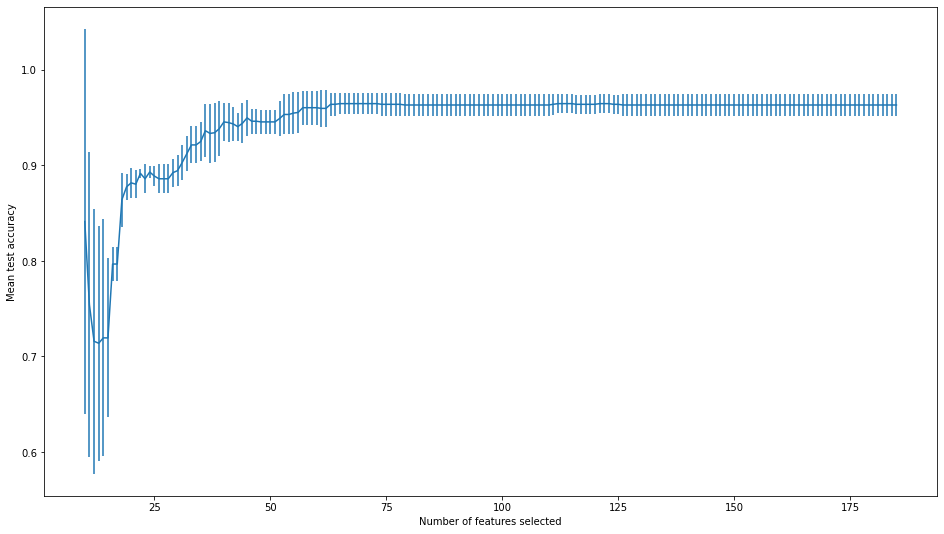

In [69]:
estimator = SVC(random_state=100, kernel='linear', C = 0.1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
rfecv = RFECV(estimator=estimator, cv=cv, scoring='recall', step=1)
rfecv.fit(BL_x_train, BL_y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", BL_x_train.columns[rfecv.support_])

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.figure(figsize=(16, 9))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(range(10, n_scores+10), 
             rfecv.cv_results_["mean_test_score"],
             yerr=rfecv.cv_results_["std_test_score"],)


reduced_training = BL_x_train.loc[:, rfecv.support_]
reduced_test = x_test.loc[:,rfecv.support_]
reduced_val = x_val.loc[:,rfecv.support_]


Using SVM within the RFE classifier

Selecting the predictors identified by Anke: 

- age.std
- gender.male_1
- n_prescribed_medicines.std
- high_risk_medicines.yes_1
- eGFR.below_60_1
- n_specialty_MUMC.std
- out_specialty_current_MUMC.group_A_1
- out_specialty_current_MUMC.group_B_1
- independent_inadequate_composite.yes_1

In [52]:
predictors = ["age.std", "gender.male_1", "n_prescribed_medicines.std", "high_risk_medicines.yes_1", 
              "eGFR.below_60_1", "n_specialty_MUMC.std", "out_specialty_current_MUMC.group_A_1", 
              "out_specialty_current_MUMC.group_B_1", "independent_inadequate_composite.yes_1"]

refined_training = BL_x_train.loc[:,predictors]
refined_training.head

refined_test = x_train.loc[:,predictors]
refined_val = x_val.loc[:,predictors]


The issue is that we cannot gain an accurate idea of which features are more informative than others for the 'top 77' obtained. 

## XGBoost model  with Borderline-SMOTE upsampled data
We're going to use recursive feature eleiminiation with CV as the RFE process here, it should seelct the same features as shown above. 

Then we will run a grid search to find the most optimal parameters.
We will hypertune the following: 

For dealing with the complexity of the model, we'll find optimal values for:
- max_depth:  Maximum tree depth for base learners.
- min_child_weight: Min sum of instance weight needed in a child node
- gamma: a pseudo-regularisation parameter, Min loss reduction required to make a further partition on a leaf node. higher Gamma = higher regularization

Then for adding noise (randomness) for a more robust approach, we'll find optimal values for:  
- colsample_bytree: fraction of columns to be randomly sampled for each tree. It might improve overfitting.
- subsample: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees.

Can also then reduce step size with 
- eta: learning rate or XGB algorithm
Then also num_round should be increased apparently
- num_round: The number of rounds for boosting

Lastly, there are regularization paramters to investigate
- alpha: lasso regression - L1 regularization
- lambda: ridge regression - L2 regularization

## Model 1
#### Model training with the features obtained from the recursive feature eliminiation

In [72]:

# estimator = SVC(random_state=10, kernel='linear', C =0.001)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# rfecv = RFECV(estimator=estimator, cv=cv, scoring='precision', step=1, min_features_to_select = 10)
# rfecv.fit(BL_x_train, BL_y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected features: ", BL_x_train.columns[rfecv.support_])

# # # setting training set with selected columns
# reduced_training = BL_x_train.loc[:,rfecv.support_]

# then defining the training and testing classifier
xgb_model = XGBClassifier(n_jobs=-2, random_state=25)

# hyperparameters to search through, only those dealing with model complexity for now 
param_grid = {'max_depth': [5, 10, 20],
              'min_child_weight': [0.1, 1, 10, 20],
              'gamma': [0.1, 1, 10, 20]}
              
# find the optimal combination of parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
grid_search.fit(reduced_training, BL_y_train)

# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

# train the XGBoost model with the optimal hyperparameters on the full dataset
xgb_model = XGBClassifier(**grid_search.best_params_, 
                          objective='binary:logistic',
                          random_state = 18)

xgb_model.fit(reduced_training, BL_y_train)

reduced_val = x_val.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

reduced_test = x_test.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Selected features:  Index(['n_visits_out_all_12m_MUMC.ord', 'inoutER_12m_external_hospital.yes_1',
       'current_diseases.asthma_COPD_1',
       'current_diseases.cardiovascular_disease_1',
       'current_diseases.cardiac_arrhythmia_1',
       'current_diseases.heart_failure_1', 'current_diseases.cancer_1',
       'n_current_diseases.std',
       'high_risk_medicines.systemic_corticosteroids_1',
       'high_risk_medicines.immunosuppressants_1',
       'high_risk_medicines.oncolytics_1',
       'inout_specialty_12m_MUMC.ophthalmology_1',
       'inout_specialty_12m_MUMC.internal_medicine_1',
       'inout_specialty_12m_MUMC.rheumatology_1',
       'inout_specialty_12m_MUMC.other_1', 'n_ER_12m_external_hospital.std',
       'person_responsible_for_medicines.partner_or_caregiver_or_health_professional_1',
       'independent_composite.yes_1', 'education.type_1_1',
       'education.type_2_1', 'education.type_3_1', 'education.type_4_1',
       'medicines_literacy.adequate_1', 'medicine

Carrying on the parameter optimization, we'll take the given (or similar) values of what we obtained from the grid search above and input those into the same XGBoost model below, then we can focus on optimizing the parameters dealing with noise

In [74]:

# hyperparameters to search through, now dealing with parameters for the models abilitiy to handle noise
param_grid = {'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 0.8],
              'subsample': [0.1, 0.3, 0.5, 0.75, 0.8]}
#               'scale_pos_weight': [5, 10, 25]}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
grid_search.fit(reduced_training, BL_y_train)

# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

xgb_model = XGBClassifier(**grid_search.best_params_,
                          objective='binary:logistic',
                          random_state = 2, max_depth = 10, 
                          min_child_weight = 1, gamma = 0.1) # scale_pos_weight = 10)

xgb_model.fit(reduced_training, BL_y_train)

reduced_val = x_val.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

reduced_test = x_test.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'colsample_bytree': 0.75, 'subsample': 0.75}
Best mean cross-validation score:  0.9770180186953363
Testing on the validation set
Accuracy on validation data:  0.9510869565217391
ROC AUC on validation data:  0.4971590909090909
[[350   2]
 [ 16   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       352
           1       0.00      0.00      0.00        16

    accuracy                           0.95       368
   macro avg       0.48      0.50      0.49       368
weighted avg       0.91      0.95      0.93       368

Testing on the test set
Accuracy on test data:  0.9564270152505446
ROC AUC on validation data:  0.49660633484162897
[[439   3]
 [ 17   0]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       442
           1       0.00      0.00      0.00        17

    accuracy                           0.96       459
   macro avg       0.48      0.50      0.49

In [79]:
# hyperparameters to search through, now dealing with parameters for the models abilitiy to handle noise
param_grid = {'learning_rate': [0.0001, 0.001, 0.01],
              'scale_pos_weight': [10, 15, 25, 30]}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
grid_search.fit(reduced_training, BL_y_train)

# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

xgb_model = XGBClassifier(**grid_search.best_params_,
                          objective='binary:logistic',
                          random_state = 12, max_depth = 10, 
                          min_child_weight = 5, gamma = 10, 
                          colsample_bytree = 0.75, subsample = 0.75) # scale_pos_weight = 10)

xgb_model.fit(reduced_training, BL_y_train)

reduced_val = x_val.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

reduced_test = x_test.loc[:,rfecv.support_]
y_pred = xgb_model.predict(reduced_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'learning_rate': 0.01, 'scale_pos_weight': 10}
Best mean cross-validation score:  0.887759065734406
Testing on the validation set
Accuracy on validation data:  0.7771739130434783
ROC AUC on validation data:  0.46590909090909094
[[284  68]
 [ 14   2]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       352
           1       0.03      0.12      0.05        16

    accuracy                           0.78       368
   macro avg       0.49      0.47      0.46       368
weighted avg       0.91      0.78      0.84       368

Testing on the test set
Accuracy on test data:  0.8126361655773421
ROC AUC on validation data:  0.5067873303167421
[[370  72]
 [ 14   3]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       442
           1       0.04      0.18      0.07        17

    accuracy                           0.81       459
   macro avg       0.50      0.51      0.4

## Model 2
#### Same model training, but on the features given by Anke. 

In [80]:
print(f"Optimal number of features : {len(predictors)}")
print(f"Selected features: {predictors}")

# setting training set with selected columns


refined_training = BL_x_train.loc[:,predictors]
refined_test = x_test.loc[:,predictors]
refined_val = x_val.loc[:,predictors]

# then defining the training and testing classifier
xgb_model_2 = XGBClassifier(n_jobs=-2, random_state=16)

# hyperparameters to search through
param_grid = {'max_depth': [5, 10, 20],
              'min_child_weight': [0.1, 1, 10, 20],
              'gamma': [0.1, 1, 10, 20]}
#               'colsample_bytree': [0.1, 0.5, 0.8],
#               'subsample': [0.1, 0.5, 0.8]}
#               'learning_rate': [0.01, 0.1, 0.5, 1],
#               'scale_pos_weight': [1, 5, 10, 25]}

grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=10)
grid_search.fit(refined_training, BL_y_train)

# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

# # train the XGBoost model with the optimal hyperparameters on the full dataset
xgb_model_2 = XGBClassifier(**grid_search.best_params_, 
                          objective='binary:logistic',
                          random_state = 200)

xgb_model_2.fit(refined_training, BL_y_train)

y_pred = xgb_model_2.predict(refined_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

y_pred = xgb_model_2.predict(refined_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on test data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Optimal number of features : 9
Selected features: ['age.std', 'gender.male_1', 'n_prescribed_medicines.std', 'high_risk_medicines.yes_1', 'eGFR.below_60_1', 'n_specialty_MUMC.std', 'out_specialty_current_MUMC.group_A_1', 'out_specialty_current_MUMC.group_B_1', 'independent_inadequate_composite.yes_1']
Best hyperparameters:  {'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 1}
Best mean cross-validation score:  0.9734744254817933
Testing on the validation set
Accuracy on validation data:  0.9538043478260869
ROC AUC on validation data:  0.5284090909090908
[[350   2]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       352
           1       0.33      0.06      0.11        16

    accuracy                           0.95       368
   macro avg       0.65      0.53      0.54       368
weighted avg       0.93      0.95      0.94       368

Testing on the test set
Accuracy on test data:  0.954248366013072
ROC AUC on test data:  

In [88]:
# hyperparameters to search through
param_grid = {'colsample_bytree': [0.1, 0.3, 0.5, 0.75, 0.8],
              'subsample': [0.1, 0.3, 0.5, 0.75, 0.8]}
#               'learning_rate': [0.0001, 0.001, 0.01],
#               'scale_pos_weight': [10, 15, 25, 30]}


grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=10)
grid_search.fit(refined_training, BL_y_train)



# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)


xgb_model_2 = XGBClassifier(objective='binary:logistic',
                          random_state = 2000, 
                          gamma = 1, max_depth= 5, 
                          min_child_weight = 1)

xgb_model_2.fit(refined_training, BL_y_train)

y_pred = xgb_model_2.predict(refined_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

y_pred = xgb_model_2.predict(refined_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on test data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best hyperparameters:  {'colsample_bytree': 0.5, 'subsample': 0.8}
Best mean cross-validation score:  0.973475678520412
Testing on the validation set
Accuracy on validation data:  0.9538043478260869
ROC AUC on validation data:  0.5284090909090908
[[350   2]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       352
           1       0.33      0.06      0.11        16

    accuracy                           0.95       368
   macro avg       0.65      0.53      0.54       368
weighted avg       0.93      0.95      0.94       368

Testing on the test set
Accuracy on test data:  0.9586056644880174
ROC AUC on test data:  0.5260180995475113
[[439   3]
 [ 16   1]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       442
           1       0.25      0.06      0.10        17

    accuracy                           0.96       459
   macro avg       0.61      0.53      0.54       459

In [89]:
# hyperparameters to search through
param_grid = {'learning_rate': [0.0001, 0.001, 0.01],
              'scale_pos_weight': [10, 15, 25, 30]}

grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=10)
grid_search.fit(refined_training, BL_y_train)


# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)


xgb_model_2 = XGBClassifier(objective='binary:logistic',
                          random_state = 22, 
                          gamma = 1, max_depth= 5, 
                          min_child_weight = 1, colsample_bytree = 0.5, subsample = 0.8)

xgb_model_2.fit(refined_training, BL_y_train)

y_pred = xgb_model_2.predict(refined_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

y_pred = xgb_model_2.predict(refined_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on test data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'learning_rate': 0.01, 'scale_pos_weight': 10}
Best mean cross-validation score:  0.7521264065358494
Testing on the validation set
Accuracy on validation data:  0.9483695652173914
ROC AUC on validation data:  0.5255681818181819
[[348   4]
 [ 15   1]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       352
           1       0.20      0.06      0.10        16

    accuracy                           0.95       368
   macro avg       0.58      0.53      0.53       368
weighted avg       0.93      0.95      0.94       368

Testing on the test set
Accuracy on test data:  0.9586056644880174
ROC AUC on test data:  0.497737556561086
[[440   2]
 [ 17   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       442
           1       0.00      0.00      0.00        17

    accuracy                           0.96       459
   macro avg       0.48      0.50      0.49      

In [90]:
xgb_model_2 = XGBClassifier(objective='binary:logistic',
                          random_state = 22, 
                          gamma = 1, max_depth= 5, 
                          min_child_weight = 1, colsample_bytree = 0.5, 
                          subsample = 0.8, learning_rate = 0.01, scale_pos_weight = 10)

xgb_model_2.fit(refined_training, BL_y_train)

y_pred = xgb_model_2.predict(refined_val)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

y_pred = xgb_model_2.predict(refined_test)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on test data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Testing on the validation set
Accuracy on validation data:  0.35054347826086957
ROC AUC on validation data:  0.5710227272727273
[[116 236]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.97      0.33      0.49       352
           1       0.05      0.81      0.10        16

    accuracy                           0.35       368
   macro avg       0.51      0.57      0.30       368
weighted avg       0.93      0.35      0.48       368

Testing on the test set
Accuracy on test data:  0.37254901960784315
ROC AUC on test data:  0.589366515837104
[[157 285]
 [  3  14]]
              precision    recall  f1-score   support

           0       0.98      0.36      0.52       442
           1       0.05      0.82      0.09        17

    accuracy                           0.37       459
   macro avg       0.51      0.59      0.31       459
weighted avg       0.95      0.37      0.51       459



## Model 3

Then here, we'll do a model training with the SVM-SMOTE upsmapled data to see if there are observable differences in the two datasets 

In [ ]:
estimator = XGBClassifier(n_jobs=-2, random_state=17, max_depth=10)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=111)
rfecv3 = RFECV(estimator=estimator, cv=cv, scoring='recall', step=1)
rfecv3.fit(S_x_train, S_y_train)

print("Optimal number of features : %d" % rfecv3.n_features_)
print("Selected features: ", S_x_train.columns[rfecv3.support_])

n_scores = len(rfecv3.cv_results_["mean_test_score"])
plt.figure()
plt.figure(figsize=(16, 9))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(range(10, n_scores+10), 
             rfecv3.cv_results_["mean_test_score"],
             yerr=rfecv3.cv_results_["std_test_score"],)


reduced_training_2 = S_x_train.loc[:, rfecv3.support_]
reduced_test_2 = x_test.loc[:,rfecv3.support_]
reduced_val_2 = x_val.loc[:,rfecv3.support_]


In [94]:
# We'll try running the 1st XGBoost model we defined, so with the predictors from the RFE run
# but here we
xgb_model = XGBClassifier(n_jobs=-2, random_state=25)

# hyperparameters to search through
param_grid = {'min_child_weight': [10, 100],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.8],
              'subsample': [0.1, 0.3, 0.5, 0.8],
              'scale_pos_weight': [10, 25, 50]}
              

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
grid_search.fit(reduced_training_2, S_y_train)

# print the best hyperparameters and mean CV score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: ", grid_search.best_score_)

# train the XGBoost model with the optimal hyperparameters on the full dataset
xgb_model_3 = XGBClassifier(**grid_search.best_params_, 
                          objective='binary:logistic',
                          max_depth = 5, random_state = 18, gamma=1, learning_rate=0.1)

xgb_model_3.fit(reduced_training_2, S_y_train)

y_pred = xgb_model_3.predict(reduced_val_2)

print('Testing on the validation set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)
print("Accuracy on validation data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

y_pred = xgb_model_3.predict(reduced_test_2)

print('Testing on the test set')
# evaluate the model's performance on the new data
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)
print("ROC AUC on validation data: ", auc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best hyperparameters:  {'colsample_bytree': 0.8, 'min_child_weight': 10, 'scale_pos_weight': 10, 'subsample': 0.8}
Best mean cross-validation score:  0.7839152573195126
Testing on the validation set
Accuracy on validation data:  0.7010869565217391
ROC AUC on validation data:  0.515625
[[253  99]
 [ 11   5]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       352
           1       0.05      0.31      0.08        16

    accuracy                           0.70       368
   macro avg       0.50      0.52      0.45       368
weighted avg       0.92      0.70      0.79       368

Testing on the test set
Accuracy on test data:  0.7342047930283224
ROC AUC on validation data:  0.49434389140271495
[[333 109]
 [ 13   4]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.85       442
           1       0.04      0.24      0.06        17

    accuracy                           0.73       459
   macr

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # estimator = DecisionTreeClassifier(random_state=11, max_depth=5)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
# rfecv2 = RFECV(estimator=estimator, cv=cv, scoring='roc_auc', step=1, min_features_to_select = 10)
# rfecv2.fit(S_x_train, S_y_train)

# print("Optimal number of features : %d" % rfecv2.n_features_)
# print("Selected features: ", S_x_train.columns[rfecv2.support_])

# # # setting training set with selected columns
# # S_x_train, S_y_train
# reduced_training2 = S_x_train.loc[:,rfecv2.support_]

# # then defining the training and testing classifier
# xgb_model2 = XGBClassifier(n_jobs=-2, random_state=16)

# # hyperparameters to search through
# param_grid = {'max_depth': [3, 5, 7, 10, 12],
#               'min_child_weight': [0.1, 1, 10, 100],
#               'gamma': [0.1, 1, 10], 
#               'colsample_bytree': [0.1, 0.5, 0.8],
#               'subsample': [0.1, 0.5, 0.8],
#               'learning_rate': [0.001, 0.01, 0.1],
#               'scale_pos_weight': [5, 10, 25]}
              

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10)
# grid_search.fit(reduced_training2, S_y_train)

# # print the best hyperparameters and mean CV score
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best mean cross-validation score: ", grid_search.best_score_)

# # train the XGBoost model with the optimal hyperparameters on the full dataset
# xgb_model2 = XGBClassifier(**grid_search.best_params_, 
#                           objective='binary:logistic',
#                           random_state = 20)

# xgb_model2.fit(reduced_training2, S_y_train)

# reduced_val2 = x_val.loc[:,rfecv2.support_]
# y_pred = xgb_model2.predict(reduced_val)

# print('Testing on the validation set')
# # evaluate the model's performance on the new data
# accuracy = accuracy_score(y_val, y_pred)
# auc = roc_auc_score(y_val, y_pred)
# print("Accuracy on validation data: ", accuracy)
# print("ROC AUC on validation data: ", auc)

# print(confusion_matrix(y_val, y_pred))
# print(classification_report(y_val, y_pred))

# reduced_test2 = x_test.loc[:,rfecv2.support_]
# y_pred = xgb_model.predict(reduced_test)

# print('Testing on the test set')
# # evaluate the model's performance on the new data
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# print("Accuracy on test data: ", accuracy)
# print("ROC AUC on validation data: ", auc)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
